In [1]:
import datetime
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.rcParams["font.family"] = "Times New Roman"
from numpy import vectorize
from src.source_codes import *
from scipy.interpolate import interp1d
from datetime import timedelta
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
%matplotlib inline

In [2]:
with open("output/Hives_2016_M1.pickle", "rb") as f: 
    Set_1 = pickle.load(f)

1
2
3
4
5
6


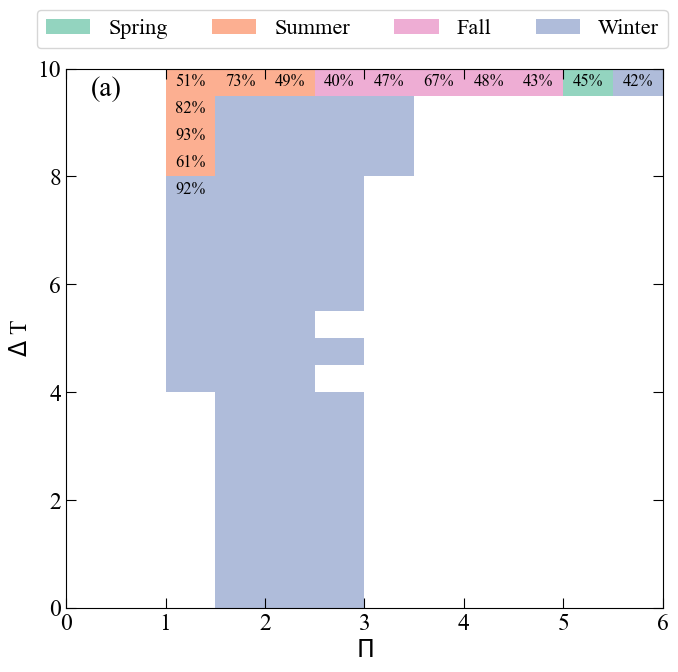

In [3]:
HIVES_INPUT=["A","B","C","D","E","F"];
summer=[12,1,2];
autumm=[3,4,5];
winter=[6,7,8];
spring=[9,10,11];
colors = ["black", "red", "purple", "pink", "gray", "magenta"];
Summer=[]; Autumm=[]; Winter=[]; Spring=[]
Interpolation_result=[]

i=0

fig = plt.figure(figsize=(7.7,7.0))
gs = fig.add_gridspec(1,1)
ax1 = fig.add_subplot(gs[0, 0])
for l in HIVES_INPUT:
    i=i+1;print(i)
    Pi_   =np.array(Set_1[f"{l}"]["Pi"])    #!!!
    Delta_=np.array(Set_1[f"{l}"]["delta"]) #!!!
    Date = np.array(Set_1[f"{l}"]["Time"])  #!!!
    Result=np.vstack((Pi_,Delta_)).T
    
    for j in range(len(Pi_)-1):
        f = interp1d(Pi_[j:j+2], Delta_[j:j+2]); Pi_values=np.linspace(Pi_[j],Pi_[j+1],12);
        try:
            Delta_values=f(Pi_values);
            Date_values=Date[j].month+ np.zeros(len(Pi_values))
            #interpolation=np.vstack((Pi_values, Delta_values));
            interpolation=np.concatenate((Pi_values.reshape(-1, 1), Delta_values.reshape(-1, 1), Date_values.reshape(-1, 1)), axis=1)
            Interpolation_result.append(interpolation)
            for l in range(len(interpolation)):
                month=interpolation[l,2]
                if month in list(summer):
                   Summer.append(np.array([interpolation[l,0],interpolation[l,1]]))
                elif  month in list(autumm):
                      Autumm.append(np.array([interpolation[l,0],interpolation[l,1]]))
                elif  month in list(winter):
                      Winter.append(np.array([interpolation[l,0],interpolation[l,1]]))
                else:
                      Spring.append(np.array([interpolation[l,0],interpolation[l,1]]))
        except ValueError:
            print("None found")
            
    for j in range(len(Pi_)):
        if Date[j].month in list(summer):
           Summer.append(Result[j])
        elif  Date[j].month in list(autumm):
              Autumm.append(Result[j])
        elif  Date[j].month in list(winter):
              Winter.append(Result[j])
        else:
              Spring.append(Result[j])
              
    

Summer=np.vstack(Summer);Autumm=np.vstack(Autumm);Winter=np.vstack(Winter); Spring=np.vstack(Spring)

    

# Plot size:
x_range = [0, 6]
y_range = [0, 10]

# Grid resolution:
resolution = 0.5

# Create a grid of squares
x = np.arange(x_range[0], x_range[1] + resolution, resolution)
y = np.arange(y_range[0], y_range[1] + resolution, resolution)
X, Y = np.meshgrid(x, y)

#fig, ax = plt.subplots(figsize=(8, 8))

# Get the number of rows and columns
rows, cols = X.shape
# Check the color of each square
for i in range(rows-1):
    for j in range(cols-1):
        # Initialize counters
        blue_count = 0
        yellow_count = 0
        brown_count =0
        green_count =0 
        
        x_min, x_max = X[i][j], X[i][j+1]
        y_min, y_max = Y[i][j], Y[i+1][j]
        


        blue_in_square = np.logical_and(Winter[:, 0] >= x_min, Winter[:, 0] <= x_max) & \
                          np.logical_and(Winter[:, 1] >= y_min, Winter[:, 1] <= y_max)
        blue_count += blue_in_square.sum() 
        
        yellow_in_square = np.logical_and(Summer[:, 0] >= x_min, Summer[:, 0] <= x_max) & \
                        np.logical_and(Summer[:, 1] >= y_min, Summer[:, 1] <= y_max) 
        yellow_count += yellow_in_square.sum()
        
        brown_in_square = np.logical_and(Autumm[:, 0] >= x_min, Autumm[:, 0] <= x_max) & \
                        np.logical_and(Autumm[:, 1] >= y_min,Autumm[:, 1] <= y_max) 
        brown_count += brown_in_square.sum()
        
        green_in_square = np.logical_and(Spring[:, 0] >= x_min, Spring[:, 0] <= x_max) & \
                        np.logical_and(Spring[:, 1] >= y_min, Spring[:, 1] <= y_max) 
        green_count += green_in_square.sum()*2
        
        predominant_season = max(blue_count,yellow_count,brown_count,green_count)
        
        # Determine which color(s) have the maximum count
        max_colors = []
        if blue_count == predominant_season: max_colors.append("#8da0cb");
        if yellow_count == predominant_season:max_colors.append("#fc8d62");
        if brown_count == predominant_season: max_colors.append("#e78ac3");
        if green_count == predominant_season: max_colors.append("#66c2a5");
        
        if predominant_season>0:
            percentage=predominant_season/(brown_count+blue_count+yellow_count+green_count)
            ax1.add_patch(plt.Rectangle((x_min, y_min), resolution, resolution, fc=max_colors[0], alpha=0.7))
            if percentage<1:
                ax1.text((x_min + x_max) / 2, (y_min + y_max) / 2, f"{percentage:.0%}",ha='center', va='center', fontsize=12, color='black')
        else:
            ax1.add_patch(plt.Rectangle((x_min, y_min), resolution, resolution, fc='white', alpha=0.7))
            
        

ax1.set_xlim([0,6])
ax1.set_ylim([0,10])


ax1.tick_params(axis='both',direction="in", which='both', top=True, bottom=True, left=True, right=True, labelsize=17, length=7)
ax1.set_xlabel(r'$\Pi$', fontsize=17)
ax1.set_ylabel(r'$\Delta$ T', fontsize=17)
ax1.text(0.25, 9.5, '(a)', fontsize=20)

legend_handles = [
    Patch(facecolor='#66c2a5', alpha=0.7),
    Patch(facecolor='#fc8d62', alpha=0.7),
    Patch(facecolor='#e78ac3', alpha=0.7),
    Patch(facecolor='#8da0cb', alpha=0.7)
]

legend_labels = [
    'Spring',
    'Summer',
    'Fall',
    'Winter'
]


ax1.legend(handles=legend_handles , labels=legend_labels , loc='upper center', fontsize=16, bbox_to_anchor=(0.48, 1.13), ncol=4)
plt.savefig('output/Fig_DeltaT_Pi_2016_colormap.pdf', format='pdf', dpi=700, bbox_inches='tight')
plt.show()
